In [27]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [2]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/all_data.csv"

In [3]:
df = pd.read_csv(path_to_file, header=None, index_col=0)
df2 = df.rename(columns={1:'gene'}, inplace=False)


In [4]:
pd.set_option('display.max_rows', 500)


In [5]:
df2.head()

,gene,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
2,gene,fast_glu_anal,hr_glu_anal,ln_fast_ins_anal,ln_hr_ins_anal,ldl_anal,tchol_anal,hdl_anal,ln_tg_anal,sbp_anal,dbp_anal,ln_creat_anal,ln_bmi_anal
2,KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
2,AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
2,NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
2,IFNG,0.88302,0.10996,0.57891,0.45358,0.60859,0.20033,0.34672,0.4963,0.093361,0.025266,0.10684,0.044815


In [6]:
path_to_file_2 = "/Users/aditgupta/Google Drive/Research/T2D/gene_names.csv"

In [7]:
df3 = pd.read_csv(path_to_file_2, header=None, index_col=0)

In [8]:
df3
df4 = df3.rename(columns={1:'gene'}, inplace=False)


In [9]:
df6 = df4.dropna()
len(df6['gene'].unique())

73

In [10]:
df5 = pd.merge(df2, df6, on='gene', how='inner')
df5.head()

,gene,2,3,4,5,6,7,8,9,10,11,12,13
0,KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
1,AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
2,NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
3,ABCC8,0.21002,0.32226,0.3885,0.50763,0.33093,0.17989,0.25546,0.0090463,0.22065,0.30258,0.23117,0.14762
4,NR1I2,0.19452,0.19478,0.030496,0.50151,0.23753,0.094493,0.48482,0.32032,0.26014,0.094558,0.013724,0.10563


In [11]:
df7 = df5.dropna(subset = ['gene'])
wanted = df7['gene'].unique()

In [12]:
string_to_write = "\n".join(wanted)
with open("wanted_20.txt", "w") as f:
    f.write(string_to_write)

In [13]:
df5 = df5.set_index("gene")

In [14]:
df5.head()

,2,3,4,5,6,7,8,9,10,11,12,13
gene,,,,,,,,,,,,
KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
ABCC8,0.21002,0.32226,0.3885,0.50763,0.33093,0.17989,0.25546,0.0090463,0.22065,0.30258,0.23117,0.14762
NR1I2,0.19452,0.19478,0.030496,0.50151,0.23753,0.094493,0.48482,0.32032,0.26014,0.094558,0.013724,0.10563


In [15]:
df5 = df5.astype(np.float32)

In [16]:
bmi_bp_synthetic = np.array([0.00079371,0.0038529, 0.0038692, 0.011781, 0.016211, 0.020746,0.023691,0.025932,0.031883,0.03346,0.034047,0.042854,0.045173,0.050497,0.050799, 0.052086,0.052312,0.057919,0.064807,0.071449,0.076924,0.077906,0.082264,0.089912,0.091958,0.1219,0.12432,0.13278,0.1383,0.14031,0.14055,0.14078,0.1431,0.14611,0.14673,0.14708,0.16128,0.16421,0.16679,0.16906,0.17604,0.1802,0.18065,0.18321,0.18527,0.20456,0.20575,0.20709,0.21287,0.21325,0.21722,0.21781,0.23288,0.23341,0.23601,0.2409,0.24554,0.24683,0.25484,0.25776,0.27397,0.28105,0.29017,0.29022,0.29842,0.29855,0.30654,0.31335,0.37021,0.39238,0.39683,0.40993,0.41709,0.42105, 0.42813,0.43352,0.46393,0.47006,0.49413,0.50238,0.51816,0.54151,0.5448,0.55668,0.56105,0.56837,0.58265,0.58482,0.58714, 0.65654, 0.748320,.87922])

In [17]:
scipy.stats.mannwhitneyu(df5[2].values, bmi_bp_synthetic, alternative = 'less') #testing for significance for bmi and the 8 gene 'gene set'

MannwhitneyuResult(statistic=3214.0, pvalue=0.8351193951558555)

In [31]:
#all_sorted_genes is a list of dataframes
all_sorted_genes = []
for column in df5.columns:
    sorted_genes = pd.DataFrame(df5[column].sort_values(ascending=True))
    sorted_genes["rank"] = np.arange(sorted_genes.shape[0]) + 1
    sorted_genes["rank_percentile"] = (sorted_genes.shape[0] - sorted_genes["rank"])/sorted_genes.shape[0]
    all_sorted_genes.append(sorted_genes)


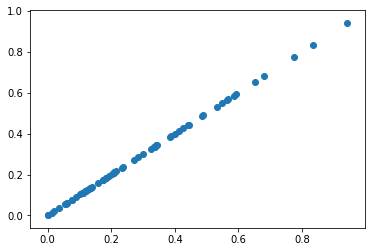

In [26]:
plt.scatter(all_sorted_genes[0][2].values, all_sorted_genes[0][2].values)

In [20]:
all_sorted_genes[0].head() 

,2,rank,rank_percentile
gene,,,
TSPO,0.001689,1,0.984375
GLP1R,0.002423,2,0.968750
KCNH2,0.014076,3,0.953125
TRDMT1,0.020503,4,0.937500
ABL1,0.036723,5,0.921875


### ''all_sorted_genes[0][2].values'' --> Get all values in second column of first dataframe

In [22]:
ranks = pd.DataFrame([x["rank"] for x in all_sorted_genes]).T
ranks.columns = [x.columns[0] for x in all_sorted_genes]

In [23]:
ranks

,2,3,4,5,6,7,8,9,10,11,12,13
TSPO,1,3,27,21,42,35,48,61,48,44,39,47
GLP1R,2,5,57,61,16,8,11,26,3,4,60,18
KCNH2,3,39,20,38,12,13,32,48,7,24,2,9
TRDMT1,4,10,3,16,59,59,17,52,56,39,62,5
ABL1,5,16,23,29,45,30,34,6,22,38,45,38
NR3C1,6,42,30,53,37,60,53,54,11,26,4,17
ATP4A,7,2,59,2,56,33,3,28,44,6,32,60
AHR,8,8,46,58,9,5,37,56,30,13,43,43
AGTR1,9,9,18,25,21,22,25,17,16,7,29,62
EDNRA,10,15,50,26,38,43,6,4,29,31,27,46


In [32]:
scipy.stats.mannwhitneyu(all_sorted_genes[0][2].values, bmi_bp_synthetic, alternative = 'less') #testing for significance for bmi and the 8 gene 'gene set'

MannwhitneyuResult(statistic=3214.0, pvalue=0.8351193951558555)